In [1]:
import pandas as pd
#pd.options.display.max_rows = 500 # for showing truncated results
import seaborn as sns
sns.set(rc={'figure.figsize':(7,5)})
import matplotlib.pyplot as plt
import numpy as np


df_full = pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")

In [2]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [3]:
df_full.shape

(8378, 195)

In [4]:
df_full.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_full.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [6]:
list(df_full.columns)

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 

In [7]:
df_full.age.isnull().sum()

95

In [8]:
df_full = df_full[- df_full.age.isna()]

In [9]:
df_full.age.isnull().sum()

0

In [10]:
len(df_full.iid.unique())

543

In [11]:
df = df_full.drop_duplicates("iid")

Since we have multiple iids (but it's always the same person), we drop duplicates so we have all the partecipants only once, and we can plot the distribution of the age without all the repetitions.

Text(0, 0.5, 'Frequency')

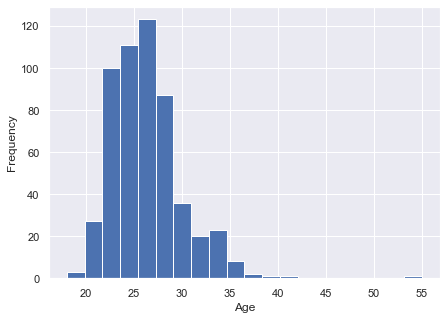

In [12]:
plt.hist(df.age, bins = 20)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [13]:
df.age.value_counts()

27.0    68
24.0    56
23.0    56
25.0    55
26.0    55
28.0    47
22.0    44
29.0    40
30.0    36
21.0    22
32.0    13
33.0    12
34.0    11
31.0     7
20.0     5
35.0     4
36.0     4
19.0     2
38.0     1
39.0     1
18.0     1
37.0     1
42.0     1
55.0     1
Name: age, dtype: int64

Text(0, 0.5, 'Frequency')

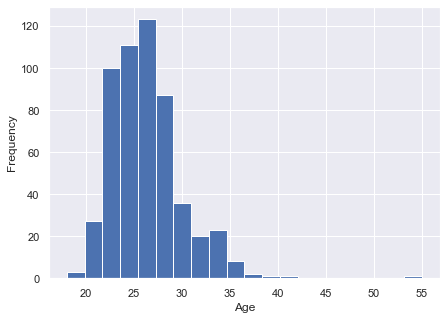

In [14]:
plt.hist(df.age, bins = 20)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [15]:
#data.groupby("age").count().id

In [16]:
n_females = df.gender[df.gender == 0].count()

In [17]:
n_males = df.gender[df.gender == 1].count()

In [18]:
df.shape[0] == n_males + n_females

True

In [19]:
df['gender'] = df.gender.map({1 : 'Male', 0 : 'Female'})

/Users/Carlo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df.gender.head()

0     Female
10    Female
20    Female
30    Female
40    Female
Name: gender, dtype: object

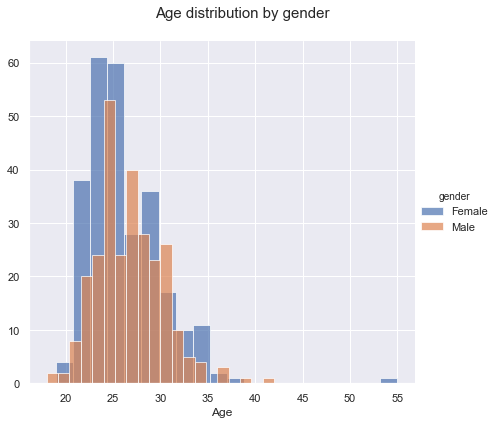

In [21]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'age', alpha= 0.7, bins=20)
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age distribution by gender', fontsize=15)
g.add_legend()

In [22]:
df[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
             mean median   min   max count
gender                                    
Female  26.126394   26.0  19.0  55.0   269
Male    26.587591   27.0  18.0  42.0   274

There are no big differences in age, but we can see that the males at these events are slightly older than the female participants.

In [23]:
df.race.unique()

array([4., 2., 6., 3., 1.])

In [24]:
df["race"] = df.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'})

/Users/Carlo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df.race.value_counts(dropna=False)

White       302
Asian       136
Hispanic     42
Other        37
Black        26
Name: race, dtype: int64

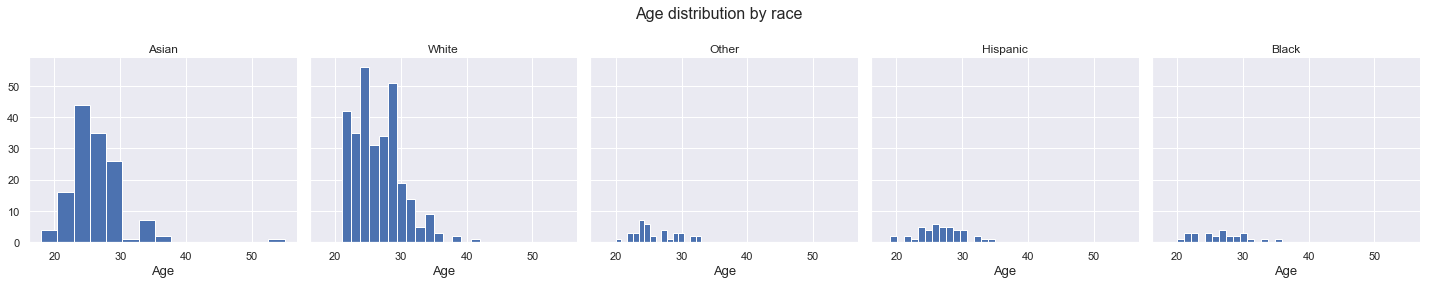

In [26]:
g = sns.FacetGrid(df, col='race', height=4)
g.map(plt.hist, 'age', bins=15)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('Age', fontsize=13)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=16)
g.add_legend()

In [27]:
df[['race', 'age']].groupby('race').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
               mean median   min   max count
race                                        
Asian     26.198529   26.0  18.0  55.0   136
Black     26.692308   27.0  20.0  36.0    26
Hispanic  26.785714   27.0  19.0  35.0    42
Other     26.162162   25.0  20.0  33.0    37
White     26.367550   26.0  21.0  42.0   302

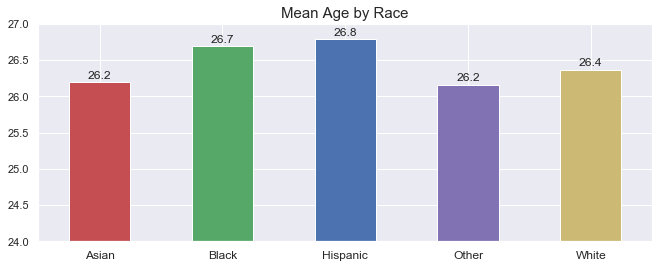

In [28]:
ax = df[['race', 'age']].groupby('race').mean().plot(kind='bar',
                                                     figsize=(11,4),
                                                     legend=False,
                                                     title='Mean Age by Race',
                                                     ylim=(24,27), color='rgbmy')

ax.set_xticklabels(['Asian', 'Black', 'Hispanic',  'Other', 'White'], fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)
ax.title.set_fontsize(15)

for i in ax.patches:
    ax.text(i.get_x()+.155, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

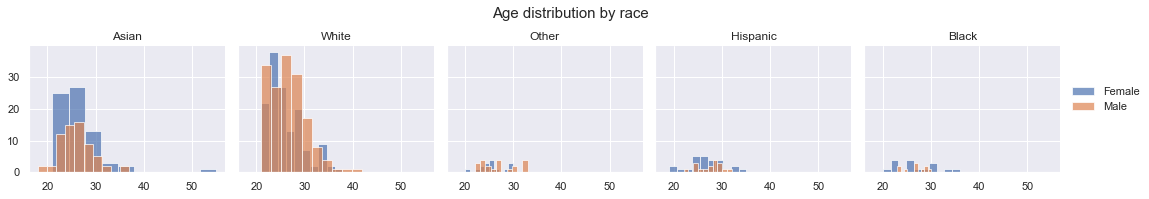

In [29]:
g = sns.FacetGrid(df, col='race', hue='gender')
g.map(plt.hist, 'age', alpha= 0.7, bins=10)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=15)

g._legend.set_title('')

In [30]:
df[['race','gender', 'age']].groupby(['race', 'gender'])\
.agg(['mean', 'median', 'min', 'max', 'count'])

age                         
                      mean median   min   max count
race     gender                                    
Asian    Female  26.380282   26.0  21.0  55.0    71
         Male    26.000000   26.0  18.0  37.0    65
Black    Female  26.625000   26.0  20.0  36.0    16
         Male    26.800000   27.0  23.0  30.0    10
Hispanic Female  26.600000   26.0  19.0  35.0    25
         Male    27.058824   28.0  22.0  32.0    17
Other    Female  25.125000   25.0  20.0  30.0    16
         Male    26.952381   27.0  22.0  33.0    21
White    Female  25.971631   25.0  21.0  38.0   141
         Male    26.714286   27.0  21.0  42.0   161

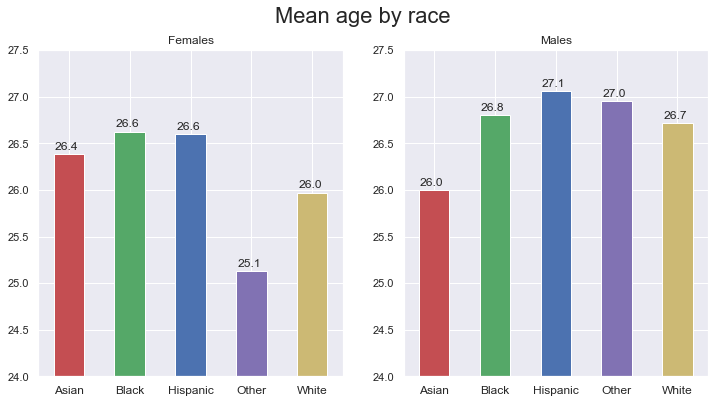

In [31]:
fig, ax= plt.subplots(1,2, figsize=(12, 6))

df[df.gender=='Female'][['race', 'age']].groupby('race').mean().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Females', ylim=(24,27.5),
                                                              color='rgbmy')

df[df.gender=='Male'][['race', 'age']].groupby('race').mean().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Males', ylim=(24,27.5),
                                                              color='rgbmy')

ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0].set_xlabel('',fontsize=1)
ax[1].set_xlabel('',fontsize=1)

fig.suptitle('Mean age by race', fontsize=22)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.02, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.02, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

For Caucasians (and "Other" race), more males than females, while we have the opposite trend for every other race. Moreover, for these 2 races, we can observe that males tend to be much older on average. Asian females are older than their male counterpart.

In [32]:
df.field_cd

0        1.0
10       1.0
20       2.0
30       1.0
40       1.0
        ... 
8268     8.0
8290     8.0
8312     8.0
8334     8.0
8356    18.0
Name: field_cd, Length: 543, dtype: float64

In [33]:
df['field_cd'] = df.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'})

/Users/Carlo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
df.field_cd.head()

0      Law
10     Law
20    Math
30     Law
40     Law
Name: field_cd, dtype: object

In [35]:
df_full.field_cd.isna().sum()

19

In [36]:
df_full[df_full.field_cd.isna()]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
504,40,1.0,1,2,2,2,19,5,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,40,1.0,1,2,2,2,19,7,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,40,1.0,1,2,2,2,19,3,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,40,1.0,1,2,2,2,19,10,NaN,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,40,1.0,1,2,2,2,19,12,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,40,1.0,1,2,2,2,19,13,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,40,1.0,1,2,2,2,19,4,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,40,1.0,1,2,2,2,19,1,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,40,1.0,1,2,2,2,19,9,NaN,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,40,1.0,1,2,2,2,19,15,NaN,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_full['field_cd'] = df_full.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'})

In [38]:
df_full[df_full.field_cd.isna()]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
504,40,1.0,1,2,2,2,19,5,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,40,1.0,1,2,2,2,19,7,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,40,1.0,1,2,2,2,19,3,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,40,1.0,1,2,2,2,19,10,NaN,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,40,1.0,1,2,2,2,19,12,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,40,1.0,1,2,2,2,19,13,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,40,1.0,1,2,2,2,19,4,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,40,1.0,1,2,2,2,19,1,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,40,1.0,1,2,2,2,19,9,NaN,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,40,1.0,1,2,2,2,19,15,NaN,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.field_cd.value_counts(dropna=False)

Econ        129
Nat. Sc.     61
Eng.         56
Law          48
Pol. Sc.     46
Soc. Sc.     46
Educ.        40
Soc. Wr.     30
Journ.       21
Hist.        17
Math         14
Arts         10
Med. Sc.      9
Film          7
Lang.         3
Oth.          3
Arch.         1
Und.          1
NaN           1
Name: field_cd, dtype: int64

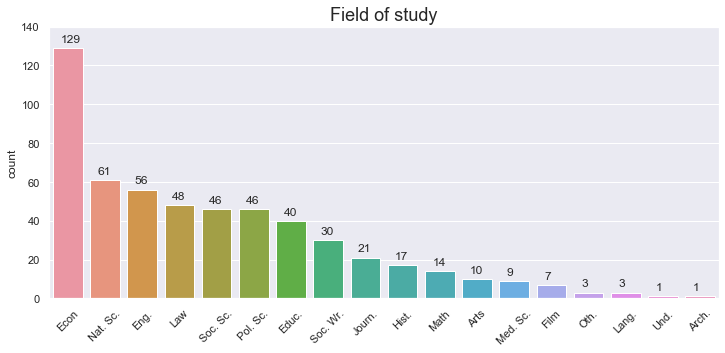

In [40]:
plt.figure(figsize = (12,5))
#ax = sns.countplot(df.field_cd)
ax = sns.countplot(x = "field_cd",
                   data = df,
                   order = df.field_cd.value_counts().index)
plt.title('Field of study', fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.ylim(0, 140)
plt.xlabel('')


for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=12)

Majority of Economics degrees, followed by Natural Sciences, Engineering, Law...

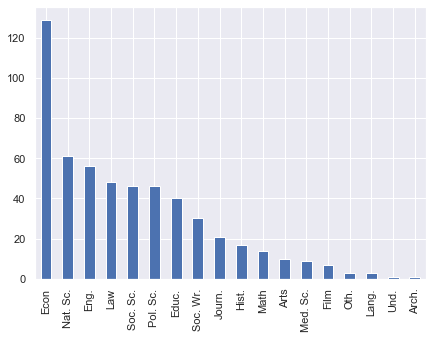

In [41]:
df.field_cd.value_counts().plot(kind="bar")

In [42]:
df[['gender','field_cd']].groupby(['field_cd','gender']).size() # does a groupby count
#df[['gender','field_cd']].groupby(['field_cd','gender']).agg(['mean','count'])

field_cd  gender
Arch.     Male       1
Arts      Female     8
          Male       2
Econ      Female    30
          Male      99
Educ.     Female    35
          Male       5
Eng.      Female    13
          Male      43
Film      Female     3
          Male       4
Hist.     Female     8
          Male       9
Journ.    Female    16
          Male       5
Lang.     Female     2
          Male       1
Law       Female    20
          Male      28
Math      Female     5
          Male       9
Med. Sc.  Female     7
          Male       2
Nat. Sc.  Female    31
          Male      30
Oth.      Female     1
          Male       2
Pol. Sc.  Female    25
          Male      21
Soc. Sc.  Female    36
          Male      10
Soc. Wr.  Female    29
          Male       1
Und.      Male       1
dtype: int64

In [43]:
df[['gender','field_cd']].groupby(['field_cd','gender']).size().unstack() # reduce 1 dimension

gender,Female,Male
field_cd,,
Arch.,NaN,1.0
Arts,8.0,2.0
Econ,30.0,99.0
Educ.,35.0,5.0
Eng.,13.0,43.0
Film,3.0,4.0
Hist.,8.0,9.0
Journ.,16.0,5.0
Lang.,2.0,1.0


In [44]:
tmp = df[['gender','field_cd']].groupby(['field_cd','gender']).size().unstack().fillna(0)

Text(0.5, 0, '')

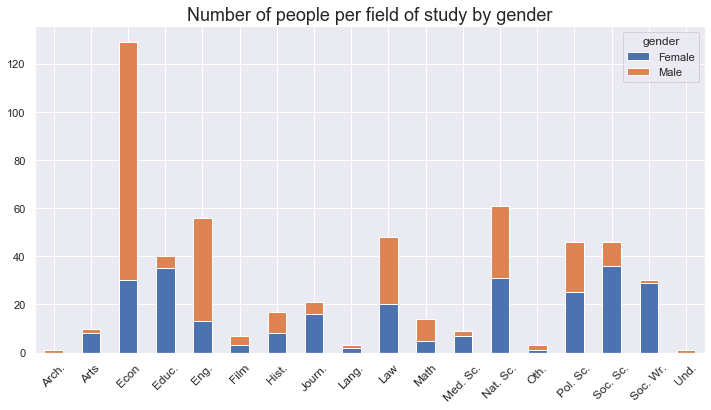

In [45]:
ax = tmp.plot(kind='bar', figsize=(12,6), stacked=True) # without stacked they are next to eachother
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Number of people per field of study by gender', fontsize=18)
ax.set_xlabel('',fontsize=1)

In [46]:
tmp = df[['gender', 'field_cd']].groupby(['field_cd', 'gender']).size().unstack().fillna(0)
tmp['% Female'] = round(tmp.Female / (tmp.Female + tmp.Male) * 100, 2)
tmp['% Male'] = round(tmp.Male / (tmp.Female + tmp.Male) * 100, 2)
tmp

gender,Female,Male,% Female,% Male
field_cd,,,,
Arch.,0.0,1.0,0.00,100.00
Arts,8.0,2.0,80.00,20.00
Econ,30.0,99.0,23.26,76.74
Educ.,35.0,5.0,87.50,12.50
Eng.,13.0,43.0,23.21,76.79
Film,3.0,4.0,42.86,57.14
Hist.,8.0,9.0,47.06,52.94
Journ.,16.0,5.0,76.19,23.81
Lang.,2.0,1.0,66.67,33.33


In [47]:
tmp[tmp["% Female"] == tmp["% Female"].max()], tmp[(tmp["% Male"] == tmp["% Male"].max())]

(gender    Female  Male  % Female  % Male
 field_cd                                
 Soc. Wr.    29.0   1.0     96.67    3.33,
 gender    Female  Male  % Female  % Male
 field_cd                                
 Arch.        0.0   1.0       0.0   100.0
 Und.         0.0   1.0       0.0   100.0)

Engineering, Economics, and Math are mostly male-dominated, Social and Medical Sciences, Arts, and Journalism are more female dominated. Natural Sciences, Political Science, and Film are very much equally represented.

Now we will see the importance of the race that was given by the participants to the survey.

Text(0, 0.5, 'Count')

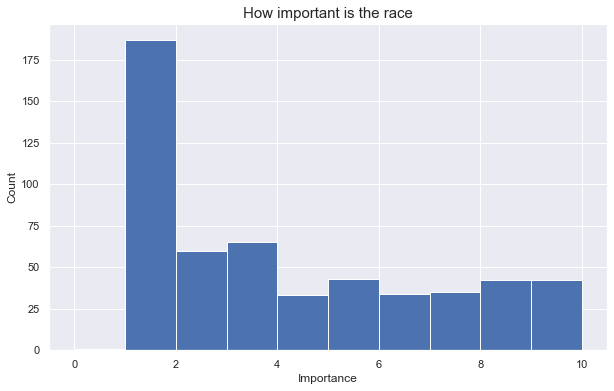

In [48]:
ax = df.imprace.hist(bins=10, figsize=(10,6))
ax.set_title('How important is the race', fontsize=15)
ax.set_xlabel('Importance',fontsize=12)
ax.set_ylabel('Count', fontsize=12)

Text(0.5, 0.98, 'Importance of race, by race')

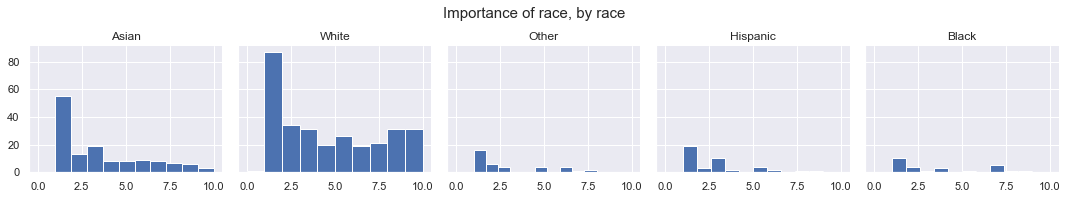

In [49]:
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprace', bins=10)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Importance of race, by race', fontsize=15)

In general, all the races don't give much importance to race.

In [50]:
df[['race', 'imprace']].groupby(['race']).agg(['mean', 'median', 'min', 'max', 'count'])

imprace                        
              mean median  min   max count
race                                      
Asian     3.382353    2.5  1.0  10.0   136
Black     3.461538    2.0  1.0   9.0    26
Hispanic  2.666667    2.0  1.0   9.0    42
Other     2.891892    2.0  1.0   8.0    37
White     4.186047    3.0  0.0  10.0   301

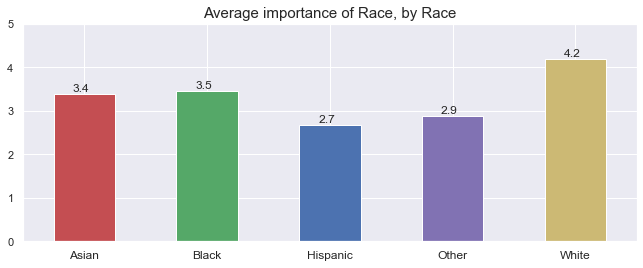

In [51]:
ax = df[['race', 'imprace']].groupby('race').mean().plot(kind='bar',
                                                     figsize=(11,4),
                                                     legend=False,
                                                     title='Average importance of Race, by Race',
                                                     ylim=(0,5), color='rgbmy')

ax.set_xticklabels(['Asian', 'Black', 'Hispanic',  'Other', 'White'], fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)
ax.title.set_fontsize(15)

for i in ax.patches:
    ax.text(i.get_x()+.155, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

From our data, White/Caucasians give more importance to race than other races.

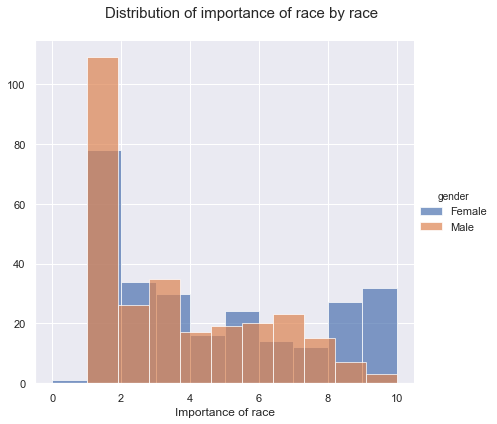

In [52]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'imprace', alpha= 0.7, bins=10)
g.set_xlabels('Importance of race', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of importance of race by race', fontsize=15)
g.add_legend()

In [53]:
df[['gender', 'imprace']].groupby(['gender']).agg(['mean', 'median', 'min', 'max', 'count'])

imprace                        
            mean median  min   max count
gender                                  
Female  4.126866    3.0  0.0  10.0   268
Male    3.368613    3.0  1.0  10.0   274

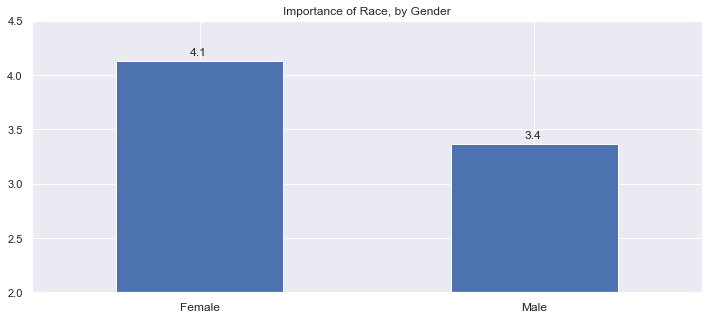

In [54]:
ax = df[['gender', 'imprace']].groupby('gender').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Importance of Race, by Gender',
                                                   ylim=(2,4.5))
ax.set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.22, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

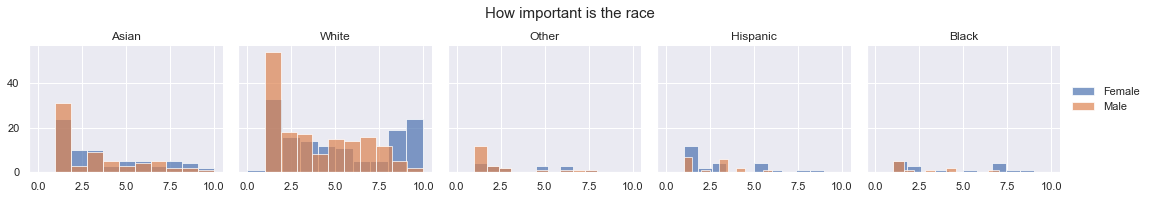

In [55]:
g = sns.FacetGrid(df, col='race', hue='gender')
g.map(plt.hist, 'imprace', alpha= 0.7, bins=10)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the race', fontsize=15)

g._legend.set_title('')

In [56]:
df[['gender', 'race', 'imprace']].groupby(['gender', 'race'])\
.agg(['mean', 'median', 'min', 'max', 'count'])

imprace                        
                     mean median  min   max count
gender race                                      
Female Asian     3.633803    3.0  1.0  10.0    71
       Black     4.062500    3.0  1.0   9.0    16
       Hispanic  2.840000    2.0  1.0   9.0    25
       Other     3.562500    3.0  1.0   8.0    16
       White     4.678571    4.0  0.0  10.0   140
Male   Asian     3.107692    2.0  1.0  10.0    65
       Black     2.500000    1.5  1.0   7.0    10
       Hispanic  2.411765    3.0  1.0   6.0    17
       Other     2.380952    1.0  1.0   8.0    21
       White     3.757764    3.0  1.0  10.0   161

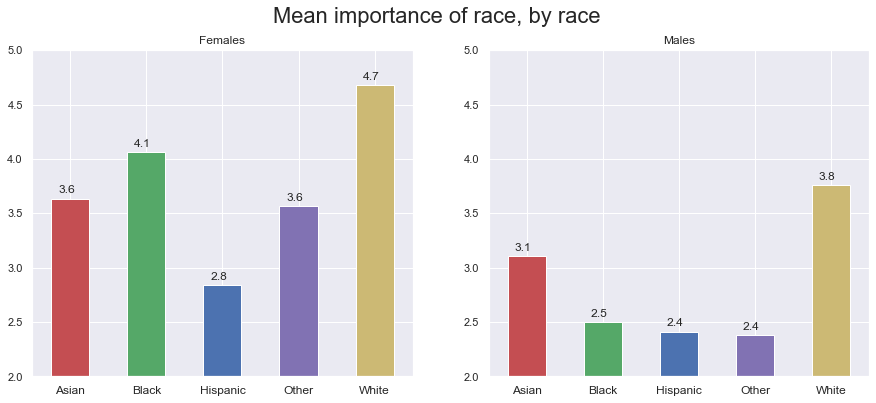

In [57]:
fig, ax= plt.subplots(1,2, figsize=(15, 6))

df[df.gender=='Female'][['race', 'imprace']].groupby('race').mean().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Females', ylim=(2,5),
                                                              color='rgbmy')

df[df.gender=='Male'][['race', 'imprace']].groupby('race').mean().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Males', ylim=(2,5),
                                                              color='rgbmy')

ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0].set_xlabel('',fontsize=1)
ax[1].set_xlabel('',fontsize=1)

fig.suptitle('Mean importance of race, by race', fontsize=22)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.09, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.09, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

The Caucasian women give more importance to race than women from other ethnicities, and also more than Caucasian men. In general women gave a higher importance to race than men.

(We can do the same exact study for the religion as we did for the race, but I will skip it as the methods used are very similar).

Now we will analyze the goals and habits of the participants.

In [58]:
df['goal'] = df.goal.map({1: 'Fun', 2: 'Meet', 3: 'Date', 
                          4: 'Relationship', 5: 'IdidIt', 6: 'Other'}).fillna(df.goal)
df_full['goal'] = df_full.goal.map({1: 'Fun', 2: 'Meet', 3: 'Date', 
                          4: 'Relationship', 5: 'IdidIt', 6: 'Other'}).fillna(df_full.goal)
df.goal.value_counts(dropna=False)

/Users/Carlo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Fun             227
Meet            189
Date             39
IdidIt           35
Other            30
Relationship     22
NaN               1
Name: goal, dtype: int64

Most of the participants declare that they are participating just for fun (or the meet new people), fewer for dates.

In [59]:
df[['gender', 'goal']].groupby(['goal', 'gender']).size().unstack()

gender,Female,Male
goal,,
Date,13,26
Fun,114,113
IdidIt,18,17
Meet,100,89
Other,14,16
Relationship,9,13


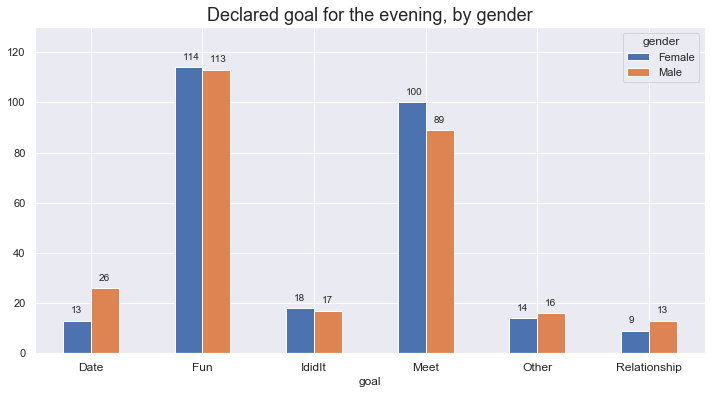

In [60]:
tmp = df[['gender', 'goal']].groupby(['goal', 'gender']).size().unstack()
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,130))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('Declared goal for the evening, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x()+.07, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=10)

The two genders differ on whether they are there to date (twice as many more males declare they came to date), and also on the meeting up, while this time women tend to be there also to meet someone new.

In [61]:
df['go_out'] = df.go_out.map({1: 'Several_pw', 2: 'Twice_pw', 3: 'Once_pw',
                             4: 'Twice_pm', 5: 'Once_pm', 6: 'Several_py',
                             7: 'Almost_never'}).fillna(df.go_out)
df_full['go_out'] = df_full.go_out.map({1: 'Several_pw', 2: 'Twice_pw', 3: 'Once_pw',
                             4: 'Twice_pm', 5: 'Once_pm', 6: 'Several_py',
                             7: 'Almost_never'}).fillna(df_full.go_out)
df.go_out.value_counts(dropna=False)

/Users/Carlo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Twice_pw        190
Several_pw      177
Once_pw         126
Twice_pm         29
Once_pm          12
Several_py        6
Almost_never      2
NaN               1
Name: go_out, dtype: int64

In [62]:
ct = pd.crosstab(df.go_out, df.goal, normalize='index')*100
ct

goal,Date,Fun,IdidIt,Meet,Other,Relationship
go_out,,,,,,
Almost_never,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
Once_pm,0.000000,33.333333,16.666667,25.000000,8.333333,16.666667
Once_pw,7.142857,40.476190,6.349206,36.507937,4.761905,4.761905
Several_pw,6.214689,44.632768,7.344633,32.203390,6.214689,3.389831
Several_py,16.666667,16.666667,0.000000,33.333333,0.000000,33.333333
Twice_pm,6.896552,31.034483,3.448276,51.724138,6.896552,0.000000
Twice_pw,8.421053,43.684211,5.789474,33.684211,5.263158,3.157895


Those who go out several times per week (once a week or twice pw), are mostly here for fun and meeting people.
This table shows, for each go_out variable, the percentage of people that answer the corresponding goal (Date, Fun, ...)

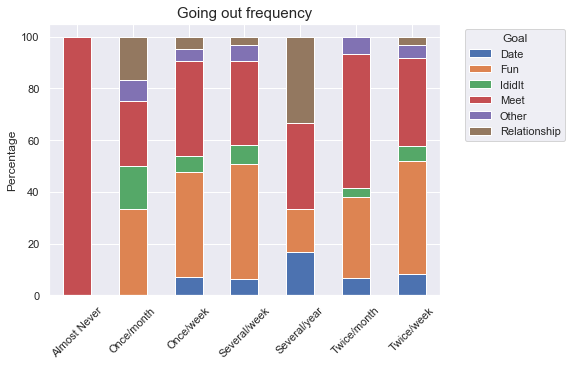

In [63]:
barplot = ct.plot.bar(stacked=True)
plt.legend(title = 'Goal', bbox_to_anchor=(1.05, 1.0), loc='upper left')
new_labels = barplot.set_xticklabels( ['Almost Never',
                          'Once/month',
                          'Once/week',
                          'Several/week',
                          'Several/year',
                          'Twice/month',
                          'Twice/week'] )

barplot.set_xticklabels(new_labels,rotation=45)

plt.title("Going out frequency", fontsize=15)
plt.xlabel("")
plt.ylabel("Percentage")
plt.show()

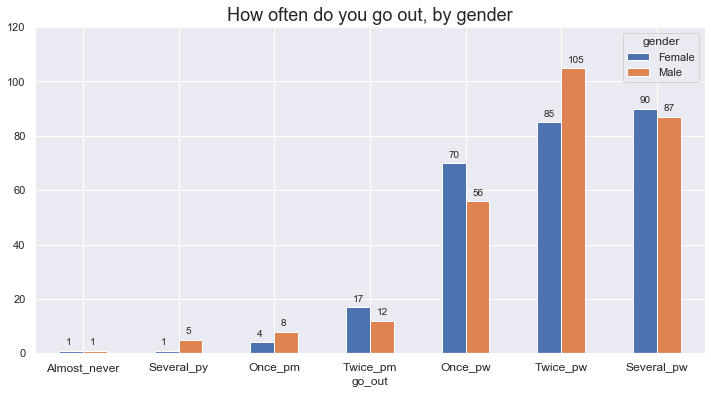

In [64]:
tmp = df[['gender', 'go_out']].groupby(['gender', 'go_out']).size().unstack(0)
tmp = tmp.reindex(['Almost_never', 'Several_py',
                   'Once_pm', 'Twice_pm',
                   'Once_pw', 'Twice_pw', 'Several_pw'])
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,120))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('How often do you go out, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x()+.07, i.get_height()+2, \
            str(round((i.get_height()), 1)), fontsize=10)

Men and women who go out several times pw are more or less in the same number, with some differences if they go out once or twice pw.

We can repeat the same exact study if we use the colomun *date* instead of *go_out*, to see for example with what frequency a certain race dates.

Now we can see the frequency of going out, compared to the race.

In [65]:
df[['race', 'go_out']].groupby(['race', 'go_out']).size().unstack().fillna(0)

go_out,Almost_never,Once_pm,Once_pw,Several_pw,Several_py,Twice_pm,Twice_pw
race,,,,,,,
Asian,2.0,5.0,42.0,36.0,2.0,11.0,38.0
Black,0.0,3.0,8.0,4.0,0.0,3.0,8.0
Hispanic,0.0,0.0,11.0,10.0,0.0,2.0,19.0
Other,0.0,0.0,8.0,13.0,2.0,1.0,13.0
White,0.0,4.0,57.0,114.0,2.0,12.0,112.0


We can say that Caucasians tend to go out several times per week, but all of the races in general go out at least once a week.

Now we look at what the participants declare to be their interest in various activities

In [66]:
def histograms(cols):
    num = len(cols)
    rows = int(num/2) + (num % 2 > 0)
    fig, ax = plt.subplots(rows, 2, figsize=(12, 5 * (rows)))
    i = 0
    j = 0
    for feat in cols:
        df[feat].hist(label=feat, ax=ax[i][j])
        ax[i][j].set_title(feat, fontsize=12)
        ax[i][j].grid(False)
        j = (j+1)%2
        i = i + 1 - j

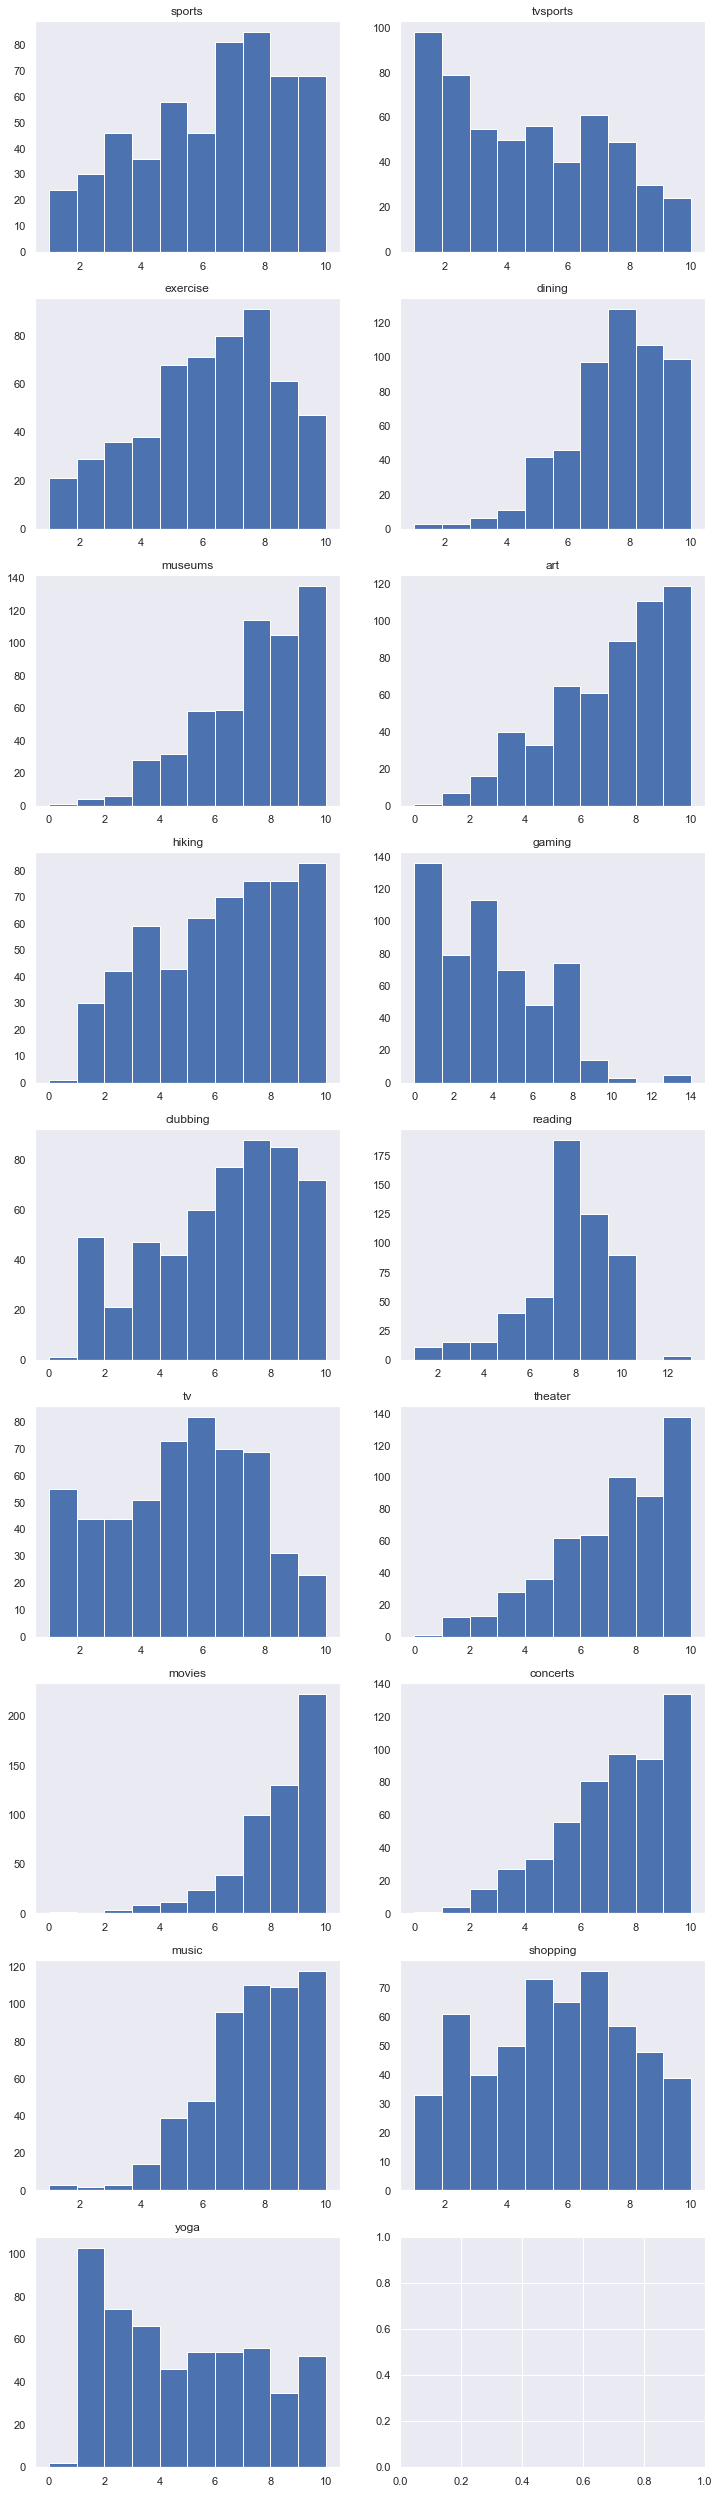

In [67]:
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']
histograms(interests)

Text(0.5, 1, 'Correlation between interests')

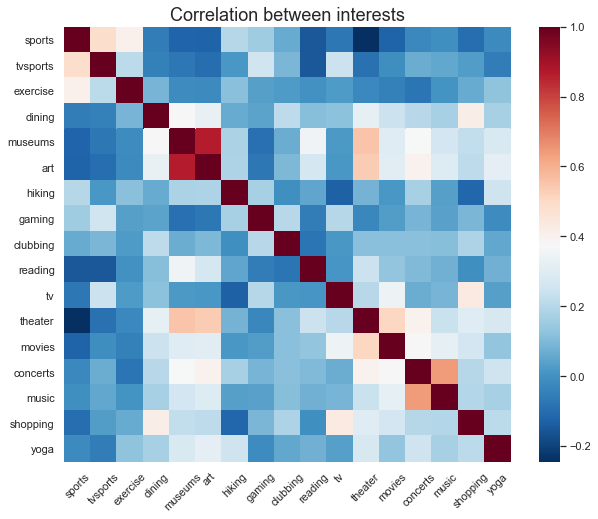

In [68]:
corr = df[interests].corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(corr, cmap='RdBu_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between interests', fontsize=18)

As it is expected, here we see that *sports* are correleted to *tvsports*, while *theater* is correleted with *museums*, *art*, and *movies*. Same for *concerts* and *music*.

We can do this analysis by gender:

Text(0.5, 1, 'Females')

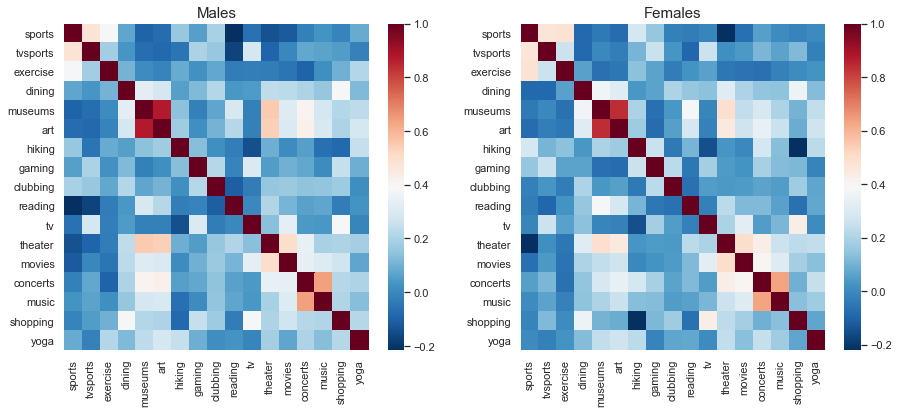

In [69]:
corr_m = df[df.gender=='Male'][interests].corr()
corr_f = df[df.gender=='Female'][interests].corr()

fig, ax= plt.subplots(1,2, figsize=(15, 6))
sns.heatmap(corr_m, cmap='RdBu_r', ax=ax[0])
sns.heatmap(corr_f, cmap='RdBu_r', ax=ax[1])

ax[0].set_title('Males', fontsize=15)
ax[1].set_title('Females', fontsize=15)

We notice that for females, *sports* is more correlated with *exercise* than in males. In males, *theater* is more correlated with *museums* and *art*. *concerts* and *music* (same for *art* and *museums*) are equally correlated in males and females.

In [70]:
df[['gender']+ interests].groupby(['gender']).mean().stack().unstack(0)

gender,Female,Male
sports,5.738806,7.054745
tvsports,4.126866,4.978102
exercise,6.395522,6.197080
dining,8.149254,7.405109
museums,7.444030,6.514599
art,7.212687,6.171533
hiking,5.932836,5.565693
gaming,3.246269,4.441606
clubbing,5.902985,5.591241
reading,7.902985,7.386861


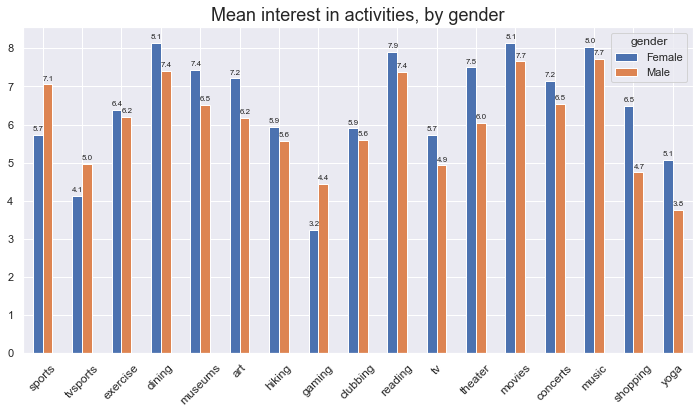

In [71]:
tmp = df[['gender']+ interests].groupby(['gender']).mean().stack().unstack(0)
ax = tmp.plot(kind='bar', figsize=(12,6))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Mean interest in activities, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.10, \
            str(round((i.get_height()), 1)), fontsize=8)

Interestingly, with the exception of Sports, tv sports, and gaming, female participants have an higher average interest than their male counterparts in every activity.
The least popular activity for girls are *gaming*, and *tvsports*, while for guys is *yoga*.

We could also see the distribution overlap for each interest to see more clearly what interests both genders.

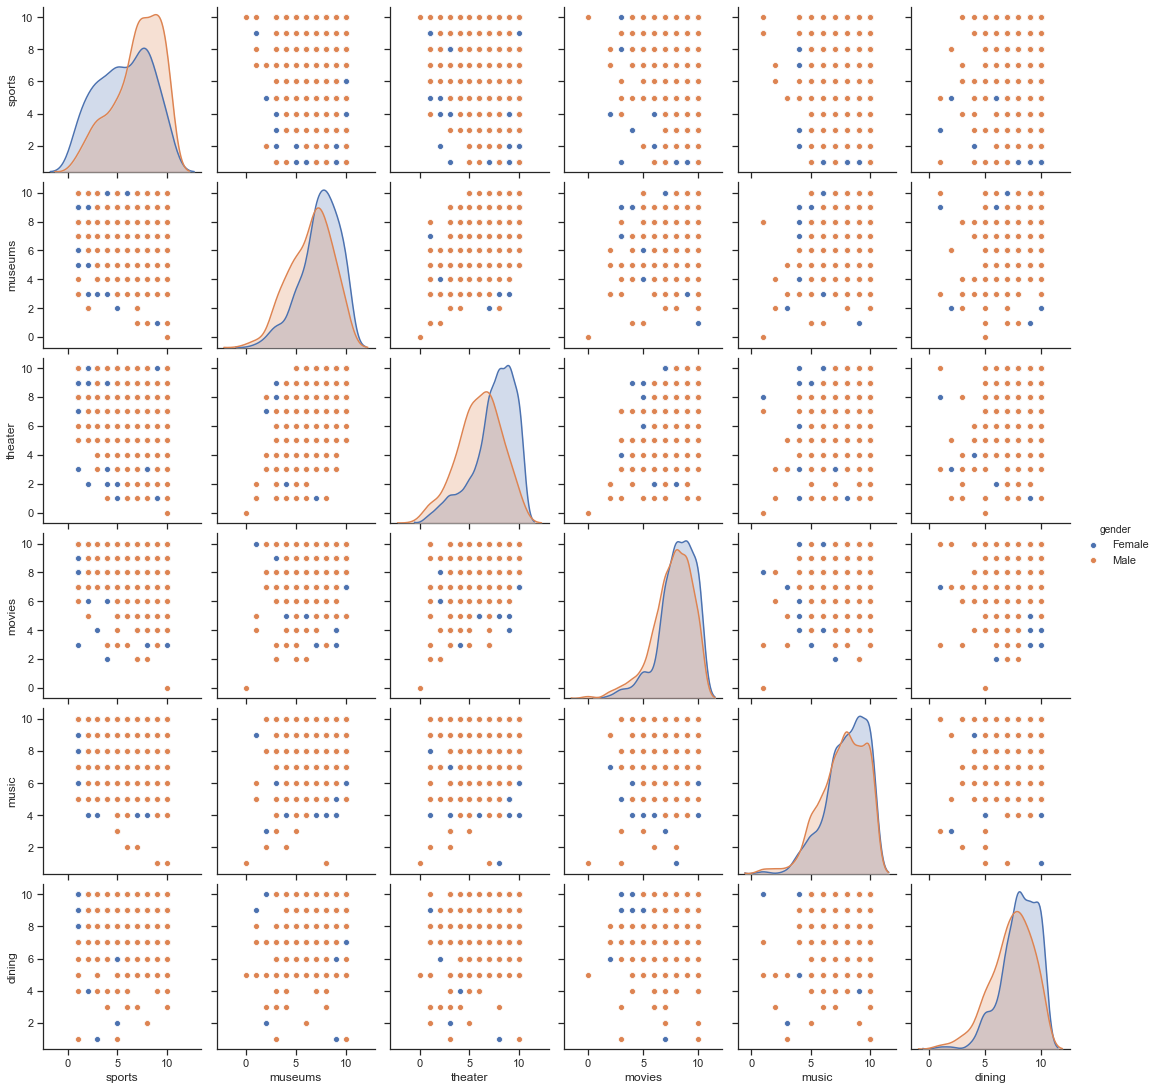

In [72]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int = df[["gender", "sports", "museums", "theater", "movies", "music", "dining"]]
g = sns.pairplot(date_int, hue="gender")

The overlapping of the distributions can be interpreted as follows: a successful date that both genders could appreciate could involve dining, music, and movies. For example, a date that involves sports might not be that interesting for female participants, while a date that involves theater would be more interesting for girls that for guys.

Text(0.5, 1.0, 'Mean interest in activities, by race')

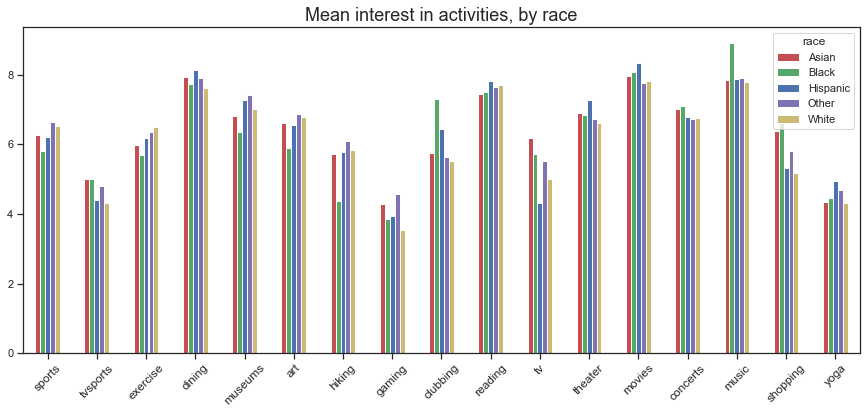

In [73]:
tmp = df[['race']+ interests].groupby(['race']).mean().stack().unstack(0)
ax = tmp.plot(kind='bar', figsize=(15,6),color='rgbmy')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Mean interest in activities, by race', fontsize=18)

In the sample we have,
* People like more doing sports and exercising than watching it on tv, white people in particular
* Black people are not much interest in gaming, but they do like music and clubbing, compared to others
* Asians like tv more than Hispanics not so much, who prefer reading, or theaters and movies

Another variable we can investigate is the one regarding the expectations of each participant.

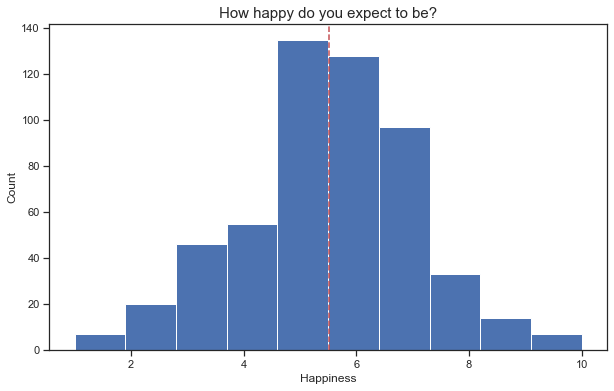

In [74]:
ax = df.exphappy.hist(bins=10, figsize=(10,6))
plt.axvline(df.exphappy.mean(), color='r', linestyle='--')
ax.set_title('How happy do you expect to be?', fontsize=15)
ax.set_xlabel('Happiness',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

In [75]:
df.exphappy.mean()

5.511070110701107

The next question is: *Out of the 20 people you will meet, how many do you expect will be interested in dating you?*

Text(0, 0.5, 'Count')

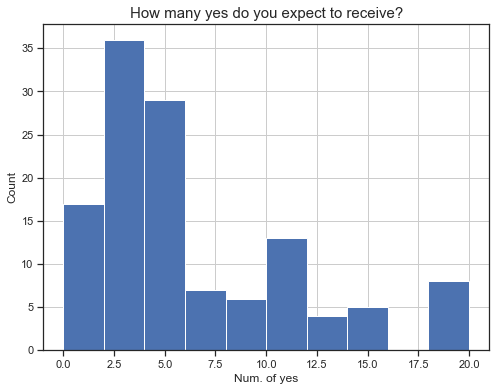

In [76]:
ax = df.expnum.hist(bins=10, figsize=(8,6))
ax.set_title('How many yes do you expect to receive?', fontsize=15)
ax.set_xlabel('Num. of yes',fontsize=12)
ax.set_ylabel('Count', fontsize=12)

In [77]:
df[['gender', 'expnum']].groupby(['gender']).agg(['mean', 'median', 'min', 'max', 'count'])

expnum                        
            mean median  min   max count
gender                                  
Female  5.870968    4.0  0.0  20.0    62
Male    5.841270    4.0  0.0  20.0    63

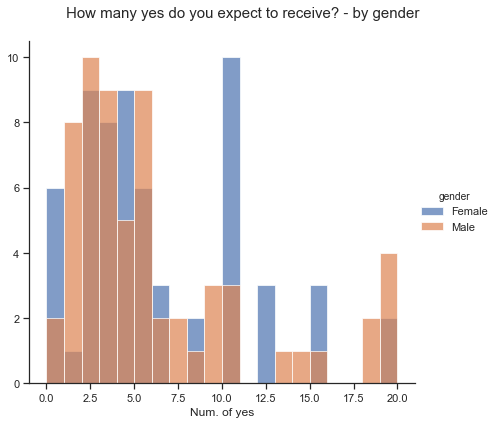

In [78]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'expnum', alpha= 0.7, bins=20)
g.set_xlabels('Num. of yes', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('How many yes do you expect to receive? - by gender', fontsize=15)
g.add_legend()

There is no much difference in the averages, but it is easy to notice that a much larger proportion of males are  confident while Females are more common in expecting a 50/50 success rate (score 10). 

Also females express low expections setting more often 0, while males 1.

In around 500 participating, there are some values that are never picked, something that we might need to consider if we want to model on that.

In [79]:
df.expnum.mean()

5.856

In [80]:
df[['race', 'expnum']].groupby(['race']).agg(['mean', 'median', 'min', 'max', 'count'])

expnum                        
              mean median  min   max count
race                                      
Asian     3.240000    3.0  0.0  14.0    25
Black     4.833333    3.5  1.0  12.0     6
Hispanic  4.583333    3.5  0.0  15.0    12
Other     6.000000    4.0  1.0  15.0    10
White     7.041667    5.0  0.0  20.0    72

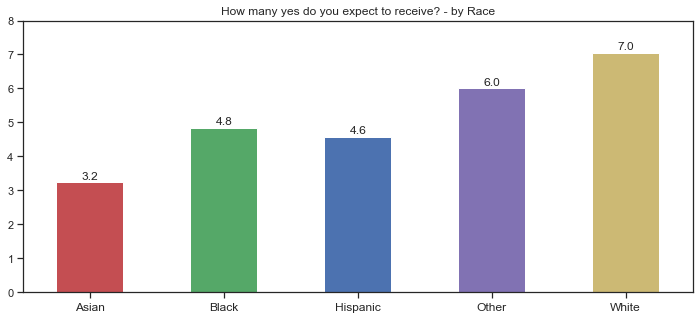

In [81]:
ax = df[['race', 'expnum']].groupby(['race']).mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='How many yes do you expect to receive? - by Race',
                                                   color='rgbmy', ylim=(0,8))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('', fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+0.19, i.get_height()+.1, \
            str(round((i.get_height()), 1)), fontsize=12)

This is a much evident difference in expectations across races. The Caucasians tend to be more confident, while Asians tend to be less confident. Black and Hispanic are the same value.

In [82]:
# out of curiosity, I want to see how many speed daters found a match!
pd.crosstab(index=df['match'],columns="count")

col_0,count
match,
0,462
1,81


In [83]:
df[['gender', 'match']].groupby(['gender','match']).size()

gender  match
Female  0        237
        1         32
Male    0        225
        1         49
dtype: int64

Female participants had less matches than the male counterparts. This also tells us that some female participants matched with multiple male participants.

In [84]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,2.0,Female,3,1,1,10,3,NaN,10,...,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
20,3,3.0,Female,5,1,1,10,9,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,4.0,Female,7,1,1,10,6,NaN,3,...,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
40,5,5.0,Female,9,1,1,10,4,NaN,1,...,4.0,5.0,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN


In [85]:
len(list(df.columns))

195

In [86]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,2.0,Female,3,1,1,10,3,NaN,10,...,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
20,3,3.0,Female,5,1,1,10,9,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,4.0,Female,7,1,1,10,6,NaN,3,...,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
40,5,5.0,Female,9,1,1,10,4,NaN,1,...,4.0,5.0,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN


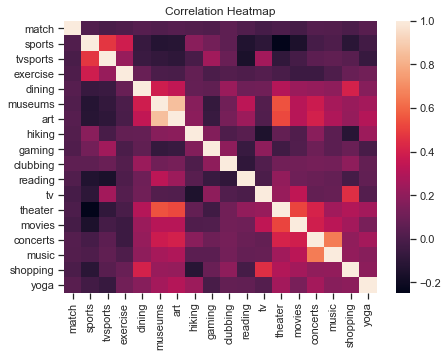

In [90]:
# heatmap
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df[["match"] + interests].corr()
sns.heatmap(corr)

To narrow down the analysis, I wanted to see if the interests played a role in setting a match. Apparently they don't.

Now let's see for how many people the match was not mutual.

In [93]:
# unrequited love count
no_matches = len(df[(df['dec_o']==0) & (df['dec']==1)]) + len(df[(df['dec_o']==1) & (df['dec']==0)])
perc_broken_heart = no_matches / len(df.index)
perc_broken_heart*100

51.93370165745856